

*   Understand the data
*   EDA


*   PCA with XG Boosting to predict churn - goal 1
*   RFE with Logistics regression to predict feature - goal 2






In [174]:
# from notebook import notebookapp

# # Set the iopub_data_rate_limit value
# notebookapp.NotebookApp.iopub_data_rate_limit = 10000000

In [175]:
# from google.colab import drive
# drive.mount('/content/drive')

In [176]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno



#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# Set the display options to show complete column values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Analysing data


In [177]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

churn = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(churn.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


Handle missing values

In [178]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [179]:
def metadata_matrix(data) :
    return pd.DataFrame({
                'Datatype' : churn.dtypes.astype(str),
                'Non_Null_Count': churn.count(axis = 0).astype(int),
                'Null_Count': churn.isnull().sum().astype(int),
                'Null_Percentage': round(churn.isnull().sum()/len(churn) * 100 , 2),
                'Unique_Values_Count': churn.nunique().astype(int)
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


Data Clean up

In [180]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [181]:
# # Specify the substring to search for
# substring = 'num'

# # Print column names containing the substring
# matching_columns = [column for column in churn.columns if substring in column]
# print(matching_columns)

def printMatchingColumns(pattern):
  # Print column names containing the substring
  matching_columns = [column for column in churn.columns if pattern in column]
  print(matching_columns)


In [182]:
churn['id'].value_counts().sum()

69999

In [183]:
printMatchingColumns("vbc")

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


In [184]:
# Renaming columns
churn = churn.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'}, axis=1)

In [185]:

columns=churn.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=churn[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and churn[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                     0
0           circle_id
1      loc_og_t2o_mou
2      std_og_t2o_mou
3      loc_ic_t2o_mou
4    std_og_t2c_mou_6
5    std_og_t2c_mou_7
6    std_og_t2c_mou_8
7    std_ic_t2o_mou_6
8    std_ic_t2o_mou_7
9    std_ic_t2o_mou_8
10    count_rech_3g_6
11    count_rech_3g_7
12    count_rech_3g_8
13   night_pck_user_6
14   night_pck_user_7
15   night_pck_user_8
16       monthly_2g_6
17       monthly_2g_7
18       monthly_2g_8
19       monthly_3g_6
20       monthly_3g_7
21       monthly_3g_8
22        sachet_3g_6
23        sachet_3g_7
24        sachet_3g_8
25          fb_user_6
26          fb_user_7
27          fb_user_8
28  churn_probability 



In [186]:
churn[change_to_cat]=churn[change_to_cat].astype('category')

In [187]:
sachet_columns = churn.filter(regex='.*sachet.*', axis=1).columns.values
churn[sachet_columns] = churn[sachet_columns].astype('category')

In [188]:
columns=churn.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
churn[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [189]:
for col in col_with_date:
    churn[col]=pd.to_datetime(churn[col], format="%m/%d/%Y")
churn[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


High Value customers

In [190]:
printMatchingColumns("rech_amt")

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [191]:
churn['Average_rech_amt_6n7']=(churn['total_rech_amt_6']+churn['total_rech_amt_7'])/2

In [192]:
churn=churn[(churn['Average_rech_amt_6n7']>= churn['Average_rech_amt_6n7'].quantile(0.7))]

# Handling missing values

In [193]:
missing_values = metadata_matrix(churn)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
count_rech_3g_6,category,62.43
max_rech_data_6,float64,62.43
count_rech_2g_6,float64,62.43
arpu_3g_6,float64,62.43
date_of_last_rech_data_6,datetime64[ns],62.43
night_pck_user_6,category,62.43
total_rech_data_6,float64,62.43
arpu_2g_6,float64,62.43
fb_user_6,category,62.43
av_rech_amt_data_6,float64,62.43


In [194]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(churn)
condition = metadata['Null_Percentage'] > 50
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
count_rech_3g_6,category,7896,13122,62.43,23
av_rech_amt_data_6,float64,7896,13122,62.43,703
max_rech_data_6,float64,7896,13122,62.43,43
count_rech_2g_6,float64,7896,13122,62.43,28
arpu_3g_6,float64,7896,13122,62.43,3499
date_of_last_rech_data_6,datetime64[ns],7896,13122,62.43,30
night_pck_user_6,category,7896,13122,62.43,2
total_rech_data_6,float64,7896,13122,62.43,34
arpu_2g_6,float64,7896,13122,62.43,3298
fb_user_6,category,7896,13122,62.43,2


In [195]:
# Dropping above columns with high missing values
high_missing_value_columns = high_missing_values.index
churn.drop(columns=high_missing_value_columns, inplace=True)

In [196]:
metadata_matrix(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,20363,655,3.12,14491
og_others_8,float64,20363,655,3.12,106
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_ic_t2t_mou_8,float64,20363,655,3.12,8085
spl_og_mou_8,float64,20363,655,3.12,2795
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_ic_t2f_mou_8,float64,20363,655,3.12,3958
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
std_og_t2f_mou_8,float64,20363,655,3.12,1303


### Month wise data handling

#### Month 6

In [197]:
sixth_month_columns = []
for column in churn.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)

In [198]:
sixth_month_columns

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6']

In [199]:
# Sixth Month meta data
metadata = metadata_matrix(churn)
print(type(metadata))
condition = metadata.index.isin(sixth_month_columns)
print(type(condition))
sixth_month_metadata = metadata[condition]
sixth_month_metadata

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_6,float64,20795,223,1.06,859
spl_og_mou_6,float64,20795,223,1.06,2643
std_og_mou_6,float64,20795,223,1.06,13776
loc_ic_t2f_mou_6,float64,20795,223,1.06,4018
loc_ic_t2t_mou_6,float64,20795,223,1.06,8285
loc_ic_t2m_mou_6,float64,20795,223,1.06,12885
loc_ic_mou_6,float64,20795,223,1.06,14882
std_ic_t2t_mou_6,float64,20795,223,1.06,3805
std_ic_t2m_mou_6,float64,20795,223,1.06,5571
std_ic_t2f_mou_6,float64,20795,223,1.06,1652


In [200]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.06
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['isd_og_mou_6', 'spl_og_mou_6', 'std_og_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'std_og_t2c_mou_6', 'og_others_6', 'roam_ic_mou_6',
       'std_og_t2t_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6',
       'roam_og_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'onnet_mou_6',
       'offnet_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'loc_og_t2m_mou_6'], dtype=object)

In [201]:
# Looking at all sixth month columns where rows of *_mou are null
condition = churn[sixth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)


for column in sixth_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

missing_rows

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [202]:
# Imputation
churn[sixth_month_meaningful_missing_cols] = churn[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
vbc_3g_6,float64,21018,0,0.0,4851
monthly_2g_6,category,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,category,21018,0,0.0,10


In [203]:
condition = churn['date_of_last_rech_6'].isnull()
churn[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
1575,0,0,0,NaT
2583,0,0,0,NaT
3008,0,0,0,NaT
3332,0,0,0,NaT
6809,0,0,0,NaT


In [204]:
churn[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

In [205]:
metadata = metadata_matrix(churn)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
vbc_3g_6,float64,21018,0,0.0,4851
monthly_2g_6,category,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,category,21018,0,0.0,10


#### Month 7

In [206]:
seventh_month_columns = []
for column in churn.columns:
    x = re.search("7$", column)
    if x:
        seventh_month_columns.append(column)

In [207]:
# seventh_month_columns P

In [208]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
# seventh_month_metadata P

In [209]:
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 0.99
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['isd_og_mou_7', 'ic_others_7', 'spl_og_mou_7', 'loc_ic_t2f_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7',
       'offnet_mou_7', 'loc_og_t2c_mou_7', 'onnet_mou_7', 'roam_ic_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7',
       'std_og_t2t_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_mou_7', 'loc_og_t2f_mou_7'], dtype=object)

In [210]:
# Looking at all sixth month columns where rows of *_mou are null
condition = churn[seventh_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)


for column in seventh_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

missing_rows

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [211]:
# Imputation
churn[seventh_month_meaningful_missing_cols] = churn[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

metadata.iloc[metadata.index.isin(seventh_month_columns)] 

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],20936,82,0.39,31
last_date_of_month_7,object,20998,20,0.10,1
ic_others_7,float64,21018,0,0.00,1119
vbc_3g_7,float64,21018,0,0.00,5158
isd_ic_mou_7,float64,21018,0,0.00,2795
spl_ic_mou_7,float64,21018,0,0.00,84
total_rech_num_7,int64,21018,0,0.00,96
total_ic_mou_7,float64,21018,0,0.00,15869
std_ic_mou_7,float64,21018,0,0.00,7083
std_ic_t2o_mou_7,category,21018,0,0.00,1


In [212]:
condition = churn['date_of_last_rech_7'].isnull()
churn[condition].filter(regex='.*rech.*7$', axis=1).head()
churn[condition].head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,Average_rech_amt_6n7
380,380,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,-2041.228,3972.71,-945.808,1501.31,2005.94,1722.39,4104.01,4619.03,5738.13,0.0,0.0,0.0,0.0,0.00,0.0,418.76,450.01,543.49,2653.43,3297.39,4524.59,17.59,0.43,5.74,5.64,0.0,9.76,3089.79,3747.84,5073.84,1082.54,1555.93,1178.89,1413.83,1317.66,1187.96,13.49,1.55,9.71,0.0,0.0,0.0,2509.88,2875.14,2376.58,0.0,0.0,0.0,5.64,1.98,10.09,0.0,0.0,0.0,5605.33,6624.98,7460.53,5.46,6.93,11.51,39.93,44.39,48.28,0.00,0.00,0.00,45.39,51.33,59.79,5.56,2.16,3.24,14.41,10.24,5.39,0.00,0.0,0.0,0.0,0.0,0.0,19.98,12.41,8.64,65.38,63.78,68.61,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.16,3,0,3,5021,0,5021,3010,0,3010,2014-06-17,NaT,2014-08-28,3010,0,3010,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1038,0.0,0.0,0.00,0,2510.5
1211,1211,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,209.788,523.74,257.159,87.28,130.09,41.51,211.39,474.58,125.81,0.0,0.0,0.0,0.0,2.16,0.0,10.64,46.91,5.11,14.34,15.36,1.48,0.00,0.00,0.00,0.00,0.0,0.00,24.99,62.28,6.59,76.63,82.28,36.39,197.04,457.94,124.33,0.00,0.00,0.00,0.0,0.0,0.0,273.68,540.23,160.73,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,298.68,602.51,167.33,1.68,17.58,3.38,1.51,13.18,7.99,0.00,1.01,0.00,3.19,31.78,11.38,0.00,0.01,0.00,0.00,0.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.51,0.00,3.19,32.29,11.38,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,4,0,5,1096,0,67,1050,0,67,2014-06-21,NaT,2014-08-27,0,0,67,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,870,0.0,0.0,0.00,0,548.0
1728,1728,109,0.0,0.0,0.0,6/30/2014,NaN,NaN,679.329,0.00,0.000,189.51,0.00,NaN,920.18,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,18.44,0.00,NaN,131.23,0.00,NaN,0.00,0.00,NaN,1.13,0.0,NaN,149.68,0.00,NaN,171.06,0.00,NaN,781.49,0.00,NaN,4.26,0.00,NaN,0.0,0.0,NaN,956.83,0.00,NaN,0.0,0.0,NaN,3.18,0.00,NaN,0.0,0.0,NaN,1109.69,0.00,0.00,5.58,0.00,NaN,84.26,0.00,NaN,2.91,0.00,NaN,92.76,0.00,NaN,0.00,0.00,NaN,20.86,0.00,NaN,5.91,0.0,NaN,0.0,0.0,NaN,26.78,0.00,NaN

In [213]:
churn[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    68
dtype: int64

#### Month 8

In [214]:
eighth_month_columns = []
for column in churn.columns:
    x = re.search("8$", column)
    if x:
        eighth_month_columns.append(column)

In [215]:
eighth_month_columns

['last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'vbc_3g_8']

In [216]:
eighth_month_metadata = metadata[metadata.index.isin(eighth_month_columns)]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2m_mou_8,float64,20363,655,3.12,10323
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
loc_og_mou_8,float64,20363,655,3.12,14507
std_og_t2t_mou_8,float64,20363,655,3.12,8937
std_og_t2f_mou_8,float64,20363,655,3.12,1303
std_og_t2c_mou_8,category,20363,655,3.12,1
std_og_mou_8,float64,20363,655,3.12,12663
isd_og_mou_8,float64,20363,655,3.12,736


In [217]:
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.12
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'ic_others_8',
       'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2o_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2f_mou_8',
       'offnet_mou_8', 'roam_og_mou_8', 'onnet_mou_8', 'roam_ic_mou_8'],
      dtype=object)

In [218]:
condition = churn[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns
missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)
for column in eighth_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [219]:
# Imputation
churn[eighth_month_meaningful_missing_cols] = churn[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],20603,415,1.97,31
last_date_of_month_8,object,20910,108,0.51,1
isd_ic_mou_8,float64,21018,0,0.00,2720
total_ic_mou_8,float64,21018,0,0.00,15373
spl_ic_mou_8,float64,21018,0,0.00,81
ic_others_8,float64,21018,0,0.00,1041
std_ic_mou_8,float64,21018,0,0.00,6715
std_ic_t2m_mou_8,float64,21018,0,0.00,5347
loc_ic_mou_8,float64,21018,0,0.00,14491
std_ic_t2t_mou_8,float64,21018,0,0.00,3694


In [220]:
condition = churn['date_of_last_rech_8'].isnull()
churn[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
183,0,0,0,NaT
224,0,0,0,NaT
1015,0,0,0,NaT
1127,0,0,0,NaT
1395,0,0,0,NaT


In [221]:
churn[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [222]:
100*churn.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / churn.shape[0]

last_date_of_month_6    0.000000
last_date_of_month_7    0.095157
last_date_of_month_8    0.513845
dtype: float64

In [223]:
print(churn['last_date_of_month_6'].unique())
print(churn['last_date_of_month_7'].unique())
print(churn['last_date_of_month_8'].unique()) 

['6/30/2014']
['7/31/2014' nan]
['8/31/2014' nan]


In [224]:
churn['last_date_of_month_7'] = churn['last_date_of_month_7'].fillna(churn['last_date_of_month_7'].mode()[0])
churn['last_date_of_month_8'] = churn['last_date_of_month_8'].fillna(churn['last_date_of_month_8'].mode()[0])

In [225]:
print(churn['last_date_of_month_6'].unique())
print(churn['last_date_of_month_7'].unique())
print(churn['last_date_of_month_8'].unique())

['6/30/2014']
['7/31/2014']
['8/31/2014']


In [226]:
metadata = metadata_matrix(churn)
# metadata P

### Single value column

In [227]:
metadata=metadata_matrix(churn)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [228]:
singular_value_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'last_date_of_month_8', 'last_date_of_month_7',
       'last_date_of_month_6', 'circle_id', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_6'], dtype=object)

In [229]:
churn.drop(columns=singular_value_cols,inplace=True)

In [230]:
date_columns = churn.filter(regex='^date.*').columns
churn.drop(columns=date_columns, inplace=True)
metadata_matrix(churn) 

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,21018,0,0.0,21018
total_ic_mou_7,float64,21018,0,0.0,15869
total_rech_num_8,int64,21018,0,0.0,90
total_rech_num_7,int64,21018,0,0.0,96
total_rech_num_6,int64,21018,0,0.0,94
ic_others_8,float64,21018,0,0.0,1041
ic_others_7,float64,21018,0,0.0,1119
ic_others_6,float64,21018,0,0.0,1011
isd_ic_mou_8,float64,21018,0,0.0,2720
isd_ic_mou_7,float64,21018,0,0.0,2795


In [231]:
churn['churn_probability'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [232]:
churn.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'churn_probability',
       'Average_rech_amt_6n7'],
      dtype='object', length=127)

In [233]:
churn['churn_probability'].value_counts(normalize=True).to_frame()

,proportion
churn_probability,
0,0.911552
1,0.088448


In [234]:
print('Final set of Columns')
churn.columns.to_frame(index=False)

Final set of Columns


,0
0,id
1,arpu_6
2,arpu_7
3,arpu_8
4,onnet_mou_6
5,onnet_mou_7
6,onnet_mou_8
7,offnet_mou_6
8,offnet_mou_7
9,offnet_mou_8


In [235]:
churn.shape

(21018, 127)

### EDA

In [236]:
# Print columns with null values
columns_with_null = churn.columns[churn.isnull().any()]
print(columns_with_null)

Index([], dtype='object')


In [237]:
# churned_customers = churn[churn['churn_probability'] == 1]
# non_churned_customers = churn[churn['churn_probability'] == 0]
# print(churned_customers)
# print(non_churned_customers)

In [238]:
colnames_numerics_only = churn.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [239]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.histplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

<Axes: xlabel='arpu_6', ylabel='Count'>

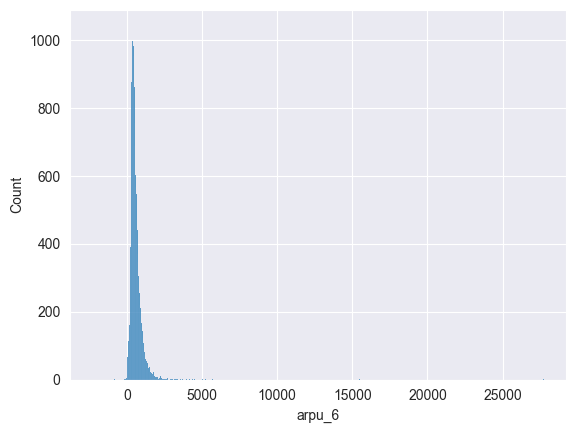

In [240]:
sns.histplot(x='arpu_6', data=churn)

<Axes: xlabel='arpu_7', ylabel='Count'>

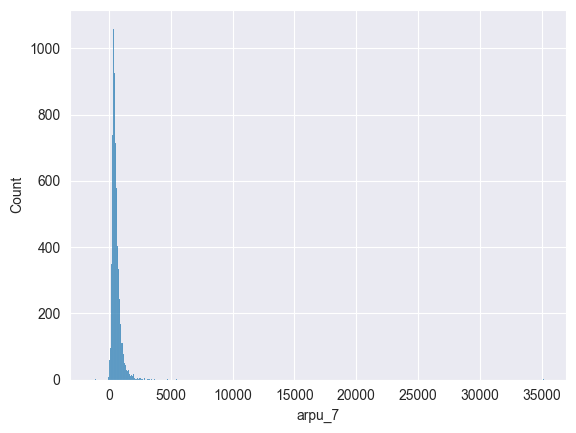

In [241]:
sns.histplot(x='arpu_7', data=churn)

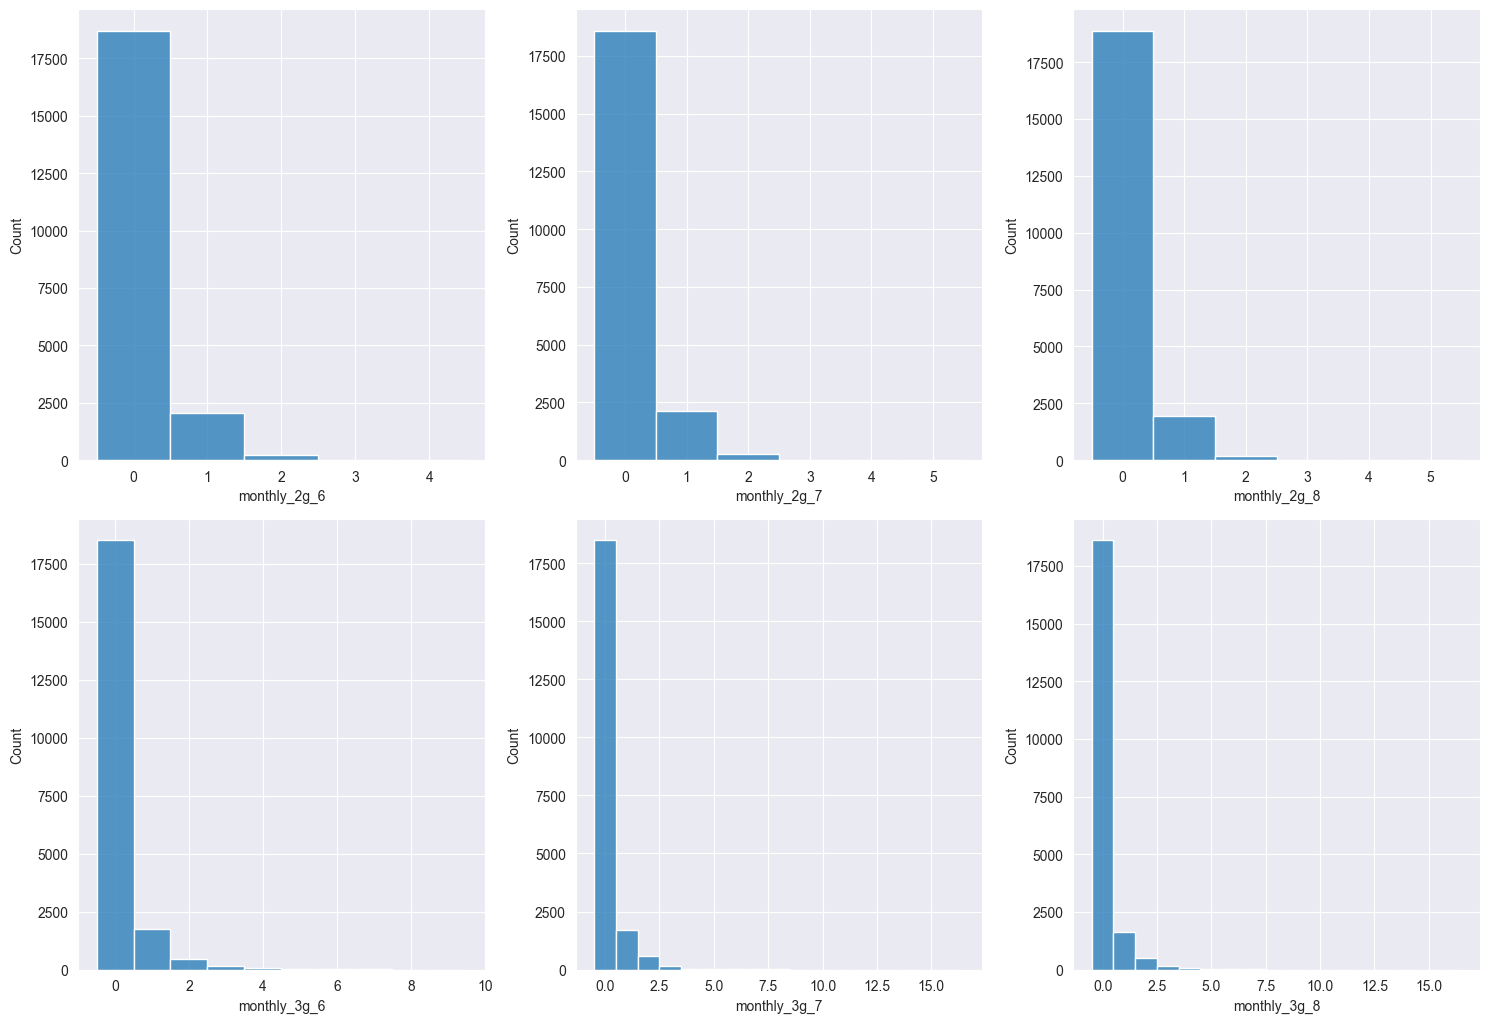

In [242]:
cols = 3
rows = 3
num_cols = [ 'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = churn[col], ax = ax)
    
fig.tight_layout()  
plt.show()

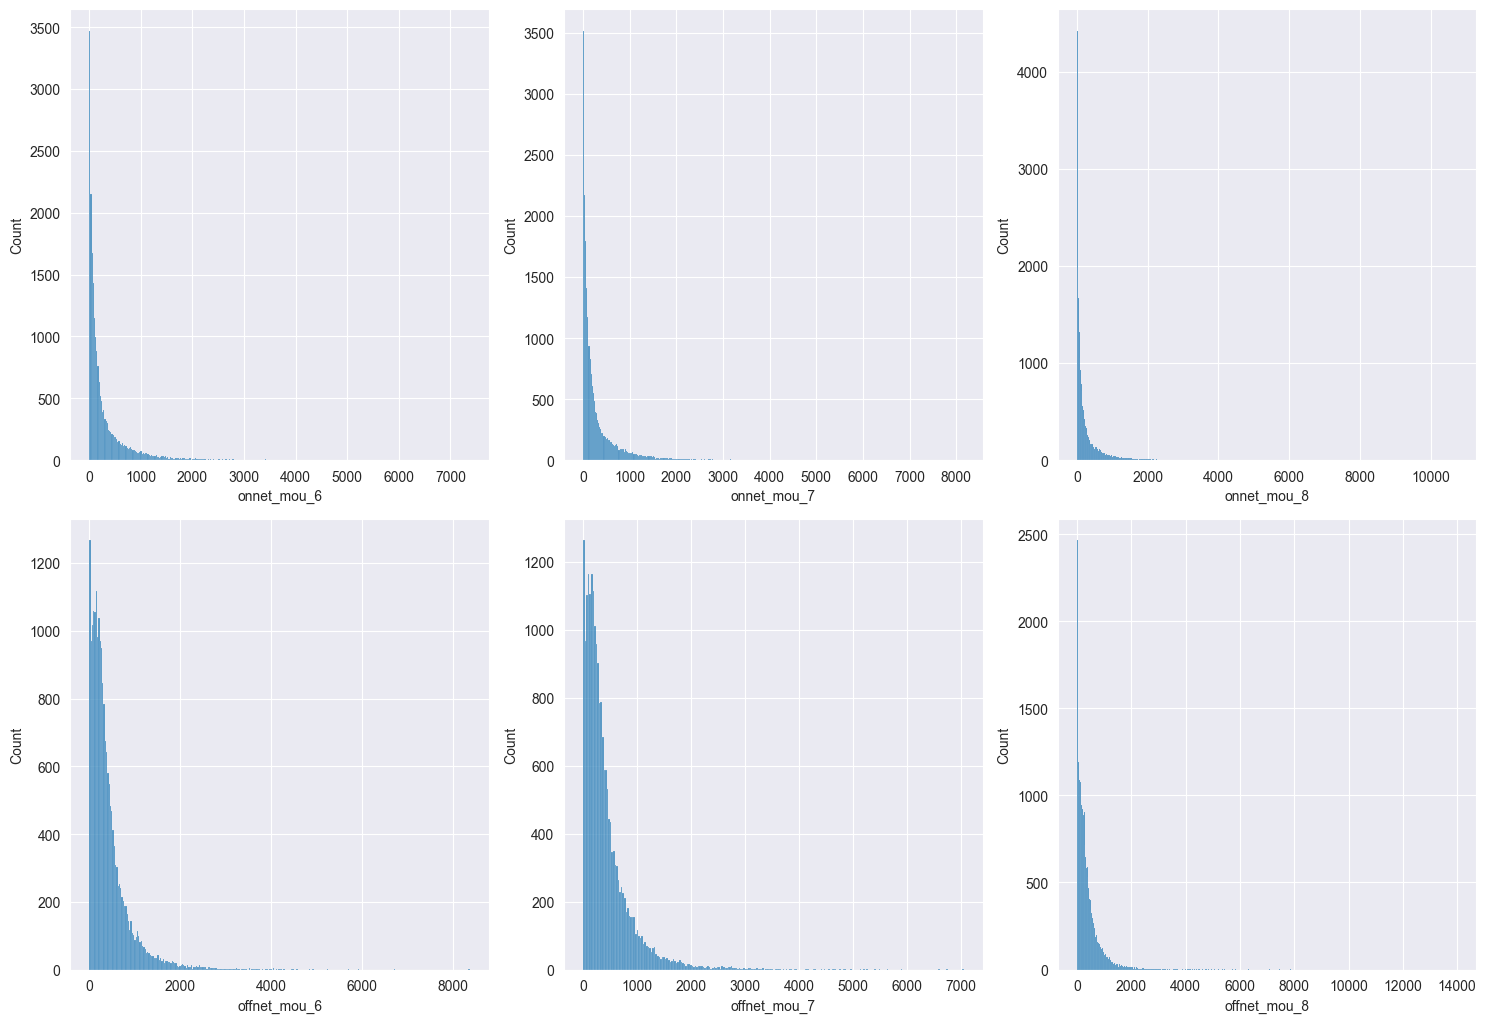

In [243]:
cols = 3
rows = 3
num_cols = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = churn[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### Bi Variate 

In [244]:
# colnames_numerics_only = churn.select_dtypes(include=np.c).columns.tolist()
# colnames_numerics_only

In [245]:
# sns.barplot(x ='sachet_2g_6', y ='churn_probability', data = churn, palette ='plasma')

In [246]:
# sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['churn_probability'])

In [247]:
# sns.scatterplot(x=data['total_og_mou_7'],y=data['total_og_mou_8'],hue=data['churn_probability'])

In [248]:
# sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_7'],hue=data['churn_probability'])

### Data Preparation

In [249]:
# Derived variables to measure change in usage 

# Usage 
churn['delta_vol_2g'] = churn['vol_2g_mb_8'] - churn['vol_2g_mb_6'].add(churn['vol_2g_mb_7']).div(2)
churn['delta_vol_3g'] = churn['vol_3g_mb_8'] - churn['vol_3g_mb_6'].add(churn['vol_3g_mb_7']).div(2)
churn['delta_total_og_mou'] = churn['total_og_mou_8'] - churn['total_og_mou_6'].add(churn['total_og_mou_7']).div(2)
churn['delta_total_ic_mou'] = churn['total_ic_mou_8'] - churn['total_ic_mou_6'].add(churn['total_ic_mou_7']).div(2)
churn['delta_vbc_3g'] = churn['vbc_3g_8'] - churn['vbc_3g_6'].add(churn['vbc_3g_7']).div(2)

In [250]:
# # Revenue 
churn['delta_arpu'] = churn['arpu_8'] - churn['arpu_6'].add(churn['arpu_7']).div(2)
churn['delta_total_rech_amt'] = churn['total_rech_amt_8'] - churn['total_rech_amt_6'].add(churn['total_rech_amt_7']).div(2)

In [251]:
churn.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

#### Outlier treatment

In [252]:
# Looking at quantiles from 0.90 to 1. 
churn.quantile(np.arange(0.9,1.01,0.01), axis=0, numeric_only=True).style.bar()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,63005.100000,798.749000,825.241000,724.516000,927.069000,936.654000,860.685000,32.996000,18.580000,18.083000,66.169000,41.246000,37.239000,205.590000,206.510000,195.840000,436.426000,433.799000,413.016000,18.396000,18.690000,16.860000,4.010000,4.710000,4.380000,655.966000,649.494000,623.402000,637.906000,669.860000,570.832000,624.491000,654.414000,542.319000,2.160000,2.110000,1.600000,1153.883000,1188.231000,1066.884000,0.000000,0.000000,0.000000,15.933000,19.296000,18.139000,2.280000,0.000000,0.000000,154.052000,154.880000,147.389000,366.680000,359.855000,357.419000,39.310000,41.180000,37.366000,556.975000,551.030000,543.820000,33.880000,35.233000,31.696000,73.202000,74.846000,67.930000,4.343000,4.553000,3.866000,114.848000,117.875000,106.716000,0.290000,0.000000,0.000000,14.810000,17.680000,15.303000,1.180000,1.580000,1.230000,23.000000,23.000000,21.000000,279.000000,279.000000,252.000000,250.000000,250.000000,225.000000,2844.000000,1113.650000,29.128500,154.610000,346.729500,146.954500,70.620500,253.846100,316.150000
0.910000,63793.400000,854.350500,879.661600,785.119400,980.440800,984.972900,907.713500,39.733500,23.769400,22.449400,78.924100,50.483500,46.558800,222.541100,222.344600,213.043400,461.774100,456.834700,437.419900,20.219400,20.790000,18.724100,4.654700,5.400000,5.050000,697.687000,685.688100,659.813500,697.098000,728.173600,624.855800,672.874500,704.846800,595.331000,2.819400,2.730000,2.084700,1214.057000,1251.372900,1135.147500,0.000000,0.000000,0.000000,17.690000,21.104700,19.810000,2.580000,0.000000,0.000000,164.334700,165.730000,157.992900,389.128700,382.466400,378.290000,43.719400,45.644100,41.524100,591.474100,581.879300,575.557000,37.280000,38.834700,35.483500,79.219400,81.649400,74.490000,5.180000,5.540000,4.654700,124.774100,128.213500,115.939900,0.300000,0.000000,0.000000,17.980000,21.494700,18.969400,1.450000,1.930000,1.510000,24.000000,24.000000,22.000000,325.000000,325.000000,289.000000,250.000000,250.000000,250.000000,2909.000000,1151.500000,38.755800,217.699050,379.509650,160.974100,96.374700,275.752580,345.000000
0.920000,64468.640000,916.618000,940.243200,851.256000,1045.784800,1041.657200,954.854000,48.922800,30.080000,28.460000,95.811200,61.665600,57.265600,245.636800,242.736400,231.479200,490.462000,483.843200,463.981200,22.586400,23.372000,20.830000,5.480000,6.122800,5.800000,738.665600,724.536000,701.000400,758.871600,793.129200,681.944000,731.818400,770.968400,655.684800,3.710000,3.606400,2.760000,1281.714000,13

In [253]:
churn.quantile(np.arange(0.9,1.01,0.01), axis=0, numeric_only=True).pct_change().mul(100).style.bar()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,1.251169,6.961073,6.594510,8.364674,5.757047,5.158671,5.464078,20.419142,27.930032,24.146436,19.276549,22.396111,25.026988,8.245099,7.667716,8.784416,5.808110,5.310224,5.908706,9.911937,11.235955,11.056346,16.077307,14.649682,15.296804,6.360238,5.572661,5.840774,9.279110,8.705341,9.464045,7.747670,7.706559,9.775059,30.527778,29.383886,30.293750,5.214913,5.313941,6.398399,nan,nan,nan,11.027427,9.373445,9.212195,13.157895,nan,nan,6.674824,7.005424,7.194499,6.122150,6.283475,5.839365,11.216993,10.840457,11.128031,6.194012,5.598479,5.835938,10.035419,10.222519,11.949457,8.220267,9.089865,9.657000,19.272392,21.678014,20.400931,8.642815,8.770732,8.643409,3.448276,nan,nan,21.404456,21.576357,23.958701,22.881356,22.151899,22.764228,4.347826,4.347826,4.761905,16.487455,16.487455,14.682540,0.000000,0.000000,11.111111,2.285513,3.398734,33.051135,40.805284,9.454099,9.540096,36.468448,8.629827,9.125415
0.920000,1.058479,7.288285,6.886921,8.423763,6.664757,5.754910,5.193324,23.127336,26.549261,26.773990,21.396633,22.150009,22.996297,10.378173,9.171259,8.653542,6.212540,5.912095,6.072266,11.706579,12.419432,11.247003,17.730466,13.385185,14.851485,5.873493,5.665535,6.242203,8.861537,8.920345,9.136220,8.760014,9.380989,10.137856,31.588281,32.102564,32.393150,5.572803,5.867947,6.951317,inf,inf,nan,9.892595,10.036153,10.412923,12.790698,nan,nan,8.749522,8.066614,9.042622,6.289976,5.893537,5.706521,12.199161,12.535026,12.880953,5.945873,6.084887,6.093263,11.905579,12.264547,12.249355,10.947571,10.140675,10.371325,21.745174,20.216606,22.027198,9.083536,9.478019,10.264025,10.000000,nan,inf,20.927697,20.448297,24.469936,24.137931,22.093264,23.178808,4.166667,4.166667,4.545455,7.692308,7.692308,14.186851,0.000000,0.000000,0.000000,2.268821,3.821103,38.046950,27.683883,11.011670,9.217321,32.425004,9.307373,8.695652
0.930000,1.072180,8.540908,7.958143,8.596850,5.380237,5.963862,6.757242,23.211672,24.317819,26.220661,19.623697,24.228419,22.827317,10.639937,11.204747,9.237029,7.013979,6.711017,5.979768,13.051659,11.912545,12.607777,15.510949,14.459071,15.312069,7.031761,7.2450

In [254]:
# Columns with outliers 
pct_change_99_1 = churn.quantile(np.arange(0.9,1.01,0.01),axis=0, numeric_only=True).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [255]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = churn[col].quantile(0.99)
    condition = churn[col] > outlier_threshold
#     outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : churn.loc[condition,col].shape[0] }, ignore_index=True)
    df = pd.DataFrame({'Column' : col,'Outlier Threshold': outlier_threshold,'Outliers replaced': churn.loc[condition,col].shape[0]}, index=[0])
    outlier_treatment = pd.concat([outlier_treatment, df])
    churn.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2178.01000,211
0,onnet_mou_7,2252.44370,211
0,onnet_mou_8,2167.07550,211
0,offnet_mou_6,2334.83110,211
0,offnet_mou_7,2385.26690,211
0,offnet_mou_8,2187.93640,211
0,roam_ic_mou_6,336.36370,211
0,roam_ic_mou_7,296.93760,211
0,roam_ic_mou_8,285.60420,211
0,roam_og_mou_6,552.15320,211


In [256]:
categorical = churn.dtypes == 'category'
categorical_vars = churn.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'churn_probability'} #independent categorical variables
ind_categorical_vars

{'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

#### Grouping Categories with less Contribution

In [257]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [258]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*churn[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    churn[col].replace(low_count_categories,'Others',inplace=True)


 +----------------+--------------+
|   monthly_3g_8 |   proportion |
|----------------+--------------|
|              0 |  88.6145     |
|              1 |   7.83614    |
|              2 |   2.4027     |
|              3 |   0.685127   |
|              4 |   0.266438   |
|              5 |   0.104672   |
|              6 |   0.0333048  |
|              7 |   0.0237891  |
|              8 |   0.0142735  |
|              9 |   0.00951565 |
|             10 |   0.00475783 |
|             16 |   0.00475783 |
+----------------+--------------+ 

Replaced [3, 4, 5, 6, 7, 8, 9, 10, 16] in monthly_3g_8 with category : Others

 +---------------+--------------+
|   sachet_2g_8 |   proportion |
|---------------+--------------|
|             0 |  79.7602     |
|             1 |   9.02084    |
|             2 |   3.18774    |
|             3 |   2.14102    |
|             4 |   1.86983    |
|             5 |   1.41783    |
|             6 |   0.87544    |
|             7 |   0.428204   |
|        

#### Creating Dummy Variables

In [259]:
my_list = list(ind_categorical_vars)
dummy_vars = pd.get_dummies(churn[my_list], drop_first=False, prefix=my_list, prefix_sep='_', dtype=int)
dummy_vars.head()

,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_Others,monthly_2g_8_0,monthly_2g_8_1,monthly_2g_8_Others,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_Others,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_Others
12,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
15,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
23,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
24,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
25,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0


In [260]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['monthly_3g_8_Others',
 'sachet_2g_8_Others',
 'sachet_3g_7_Others',
 'sachet_3g_8_Others',
 'sachet_2g_7_Others',
 'sachet_2g_6_Others',
 'monthly_3g_7_Others',
 'monthly_2g_8_Others',
 'monthly_3g_6_Others',
 'sachet_3g_6_Others',
 'monthly_2g_6_Others',
 'monthly_2g_7_Others']

In [261]:
ind_categorical_vars

{'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [262]:
# concatenating dummy variables with original 'data'
churn.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
churn = pd.concat([churn, dummy_vars], axis=1)
churn.head()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_2g_8_0,monthly_2g_8_1,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2
12,12,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,110,110,50,110,0,0,322,0,469.5,0.00,0.0,-138.925,-7.925,0.0,-26.9085,-104.5,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
15,15,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,0,150,250,602,0,527.0,224.14,0.0,44.315,124.655,0.0,-140.6355,125.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
23,23,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,110,110,144,110,50,30,455,0,1205.0,0.00,0.0,-600.100,-320.160,0.0,-538.4650,-711.0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
24,24,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,

In [263]:
dummy_cols = dummy_vars.columns.to_list()
churn[dummy_cols] = churn[dummy_cols].astype('category')

In [264]:
churn.shape

(21018, 143)

In [265]:
churn.isnull().sum()

id                      0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_mou_8        0
std_og_mou_6            0
std_og_mou_7

This following section contains

Test Train Split
Class Imbalance
Standardization
Modelling
Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
Model 2 : PCA + Logistic Regression
Model 3 : PCA + Random Forest Classifier
Model 4 : PCA + XGBoost

##### Train-Test Split

In [266]:
y = churn.pop('churn_probability') # Predicted / Target Variable
X = churn # Predictor variables

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

#### Class Imbalance

In [268]:
y.value_counts(normalize=True).to_frame()

,proportion
churn_probability,
0,0.911552
1,0.088448


In [269]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.097


#### USING SMOTE

In [270]:
!pip3 install scikit-learn==1.2.2

In [271]:
import sklearn
print(sklearn.__version__)

1.2.2


In [272]:
print("TESTING....")

TESTING....


In [273]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.shape

(26790, 142)

In [274]:
X_train_resampled = X_train_resampled.fillna(0)

In [275]:
# X_train_resampled['monthly_2g_8_0'].fillna(0)

In [276]:
X_train_resampled.isna().sum()

id                      0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_mou_8        0
std_og_mou_6            0
std_og_mou_7

In [277]:
# # Assuming 'variable' is the variable you want to check
# is_dataframe = isinstance(X_imputed, pd.DataFrame)

# if is_dataframe:
#     print("The variable is a pandas DataFrame.")
# else:
#     print("The variable is not a pandas DataFrame.")


In [278]:
print("TESTING ENDS....")

TESTING ENDS....


### Modelling

### Model 1 :  Logistic Regression

#### Baseline Logistic Regression Model

In [279]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [280]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

#### Baseline Performance

In [281]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [282]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [283]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[10968  2427]
 [  235  1082]]

Confusion Matrix for test: 
 [[4748 1016]
 [  85  457]]


In [284]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.819
Sensitivity / True Positive Rate / Recall : 0.822
Specificity / True Negative Rate :  0.819
Precision / Positive Predictive Value : 0.308
F1-score : 0.448


Test Performance : 

Accuracy : 0.825
Sensitivity / True Positive Rate / Recall : 0.843
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.31
F1-score : 0.453


##### Baseline Performance - Finding Optimum Probability Cutoff

In [285]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
23969,1,1,1,1,1,1,1,1,1,0
53530,1,0,0,0,0,0,0,0,0,0
38932,1,1,0,0,0,0,0,0,0,0
63706,1,1,1,0,0,0,0,0,0,0
8614,1,1,1,0,0,0,0,0,0,0


In [286]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    df = pd.DataFrame({'sensitivity' :sensitivity,'specificity' : specificity,'accuracy' : accuracy}, index=[0])
    metrics_df = pd.concat([metrics_df, df])
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.090
0.1,0.973,0.297,0.358
0.2,0.945,0.479,0.521
0.3,0.913,0.617,0.643
0.4,0.869,0.732,0.744
0.5,0.822,0.819,0.819
0.6,0.759,0.878,0.868
0.7,0.660,0.921,0.898
0.8,0.426,0.953,0.906
0.9,0.200,0.981,0.911


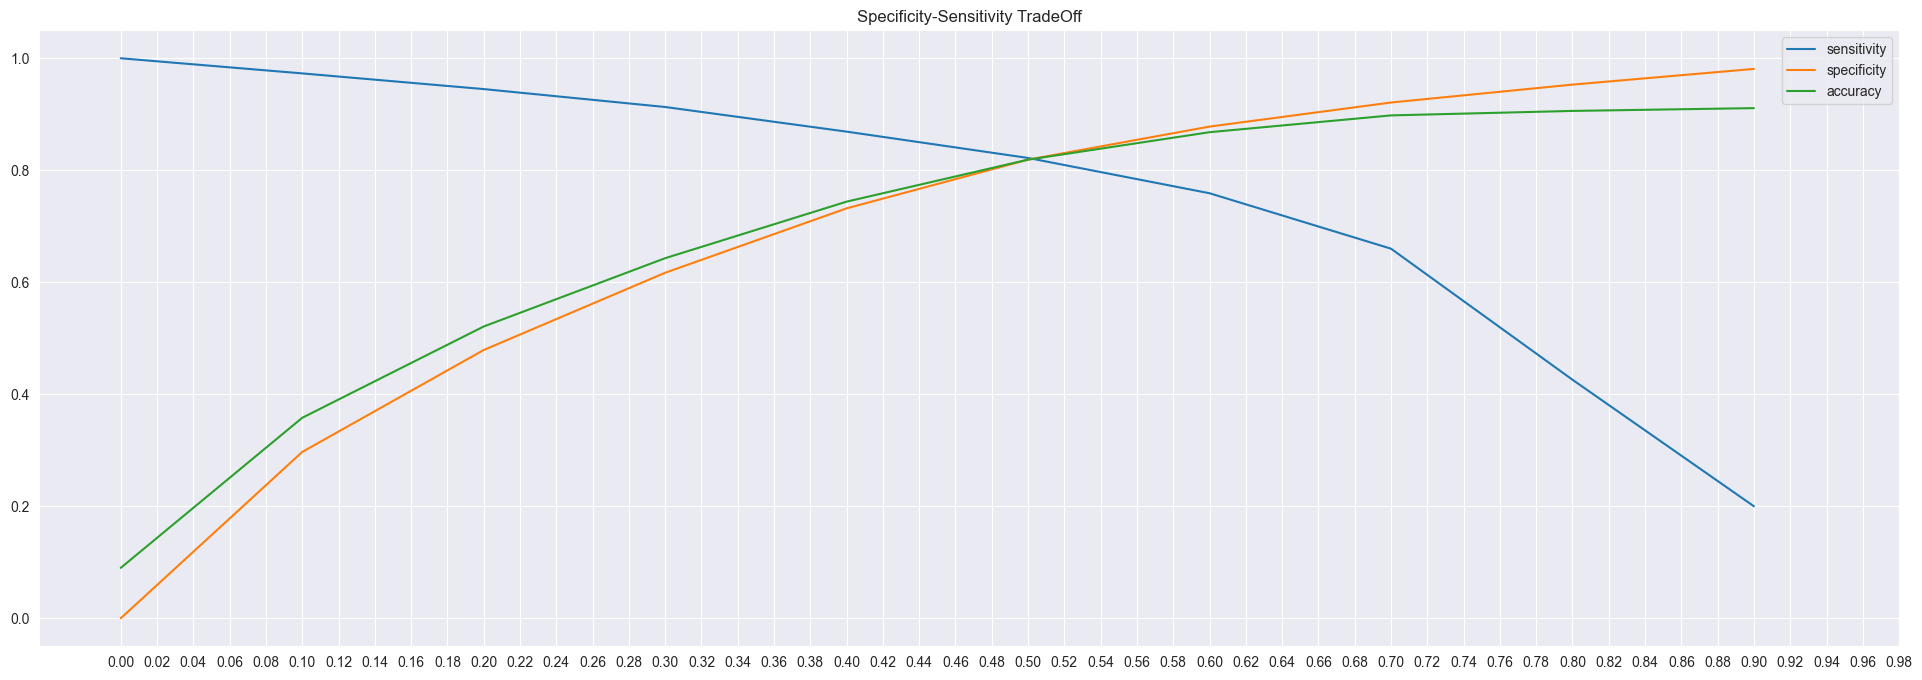

In [287]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

#### Baseline Performance at Optimum Cutoff

In [288]:
optimum_cutoff = 0.50
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[10968  2427]
 [  235  1082]]

Confusion Matrix for test: 
 [[4748 1016]
 [  85  457]]


In [289]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.819
Sensitivity / True Positive Rate / Recall : 0.822
Specificity / True Negative Rate :  0.819
Precision / Positive Predictive Value : 0.308
F1-score : 0.448


Test Performance : 

Accuracy : 0.825
Sensitivity / True Positive Rate / Recall : 0.843
Specificity / True Negative Rate :  0.824
Precision / Positive Predictive Value : 0.31
F1-score : 0.453


In [290]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.88 

ROC AUC score for Test :  0.891


#### Feature Selection using RFE

In [291]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,

In [292]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
109,sachet_3g_7_0,1,True
137,monthly_2g_6_1,1,True
139,monthly_2g_7_0,1,True
82,total_rech_num_6,1,True
83,total_rech_num_7,1,True
120,sachet_2g_6_0,1,True
84,total_rech_num_8,1,True
125,monthly_3g_7_0,1,True
136,monthly_2g_6_0,1,True
133,sachet_3g_6_0,1,True


In [293]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'monthly_2g_7_0',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'monthly_2g_6_0',
 'sachet_3g_6_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_0',
 'monthly_2g_8_1',
 'monthly_3g_8_0',
 'sachet_2g_8_0']

##### Logistic Regression with RFE Selected Columns

In [294]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
const = sm.add_constant(X_train_resampled[rfe_selected_columns])
const

logr = sm.GLM(y_train_resampled, const, family = sm.families.Binomial(), missing='drop')
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26774
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13036.
Date:                Thu, 06 Jul 2023   Deviance:                       26072.
Time:                        22:59:05   Pearson chi2:                 3.80e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3384
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6521      0.204     17.941      0.000       3.253       4.051
sachet_3g_7_0       -0.3696      0.065     -5.646      0.000      -0.498      -0.241
monthly_2g_6_1      -4.8652      0.189    -25.717      0.000      -5.236      -4.494
monthly_2g_7_0      -0.1372      0.071     -1.929      0.054      -0.277       0.002
total_rech_num_6     0.0546      0.003     20.912      0.000       0.049       0.060
total_rech_num_7     0.0827      0.003     24.570      0.000       0.076       0.089
sachet_2g_6_0       -0.5391      0.043    -12.454      0.000      -0.624      -0.454
total_rech_num_8    -0.2342      0.004    -57.113      0.000      -0.242      -0.226
monthly_3g_7_0      -0.6308      0.064     -9.811      0.000      -0.757      -0.505
monthly_2g_6_0      -2.2721      0.137    -16.643      0.000      -2.540      -2.005
sachet_3g_6_0        0.0266      0.066      0.406      0.685      -0.102       0.155
std_og_t2f_mou_8    -0.0754      0.006    -13.559      0.000      -0.086      -0.064
monthly_2g_8_0      -1.2053      0.145     -8.339      0.000      -1.489      -0.922
monthly_2g_8_1      -5.7310      0.296    -19.358      0.000      -6.311      -5.151
monthly_3g_8_0       1.6980      0.078     21.903      0.000       1.546       1.850
sachet_2g_8_0       -0.0496      0.044     -1.121      0.262      -0.136       0.037
====================================================================================
"""

#### Logistic Regression with Manual Feature Elimination

In [295]:
#Using P-value and vif for manual feature elimination


from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]

    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
monthly_2g_8_0,35.97,0.0000
monthly_2g_6_0,23.30,0.0000
monthly_3g_8_0,17.48,0.0000
monthly_2g_7_0,14.82,0.0537
sachet_3g_6_0,14.64,0.6847
sachet_3g_7_0,14.52,0.0000
monthly_3g_7_0,12.61,0.0000
total_rech_num_7,7.19,0.0000
sachet_2g_8_0,6.24,0.2622


##### 'monthly_2g_7_0' has the very p-value. Hence, this feature could be eliminated

In [296]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_2g_7_0')
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'monthly_2g_6_0',
 'sachet_3g_6_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_0',
 'monthly_2g_8_1',
 'monthly_3g_8_0',
 'sachet_2g_8_0']

#### Model II

In [297]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26775
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13038.
Date:                Thu, 06 Jul 2023   Deviance:                       26076.
Time:                        22:59:05   Pearson chi2:                 3.78e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3383
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6558      0.204     17.952      0.000       3.257       4.055
sachet_3g_7_0       -0.3730      0.065     -5.705      0.000      -0.501      -0.245
monthly_2g_6_1      -4.8709      0.190    -25.683      0.000      -5.243      -4.499
total_rech_num_6     0.0543      0.003     20.839      0.000       0.049       0.059
total_rech_num_7     0.0830      0.003     24.693      0.000       0.076       0.090
sachet_2g_6_0       -0.5451      0.043    -12.624      0.000      -0.630      -0.460
total_rech_num_8    -0.2345      0.004    -57.194      0.000      -0.242      -0.226
monthly_3g_7_0      -0.6279      0.064     -9.783      0.000      -0.754      -0.502
monthly_2g_6_0      -2.3282      0.134    -17.360      0.000      -2.591      -2.065
sachet_3g_6_0        0.0260      0.066      0.397      0.692      -0.103       0.155
std_og_t2f_mou_8    -0.0753      0.006    -13.551      0.000      -0.086      -0.064
monthly_2g_8_0      -1.2705      0.140     -9.065      0.000      -1.545      -0.996
monthly_2g_8_1      -5.7471      0.296    -19.418      0.000      -6.327      -5.167
monthly_3g_8_0       1.6929      0.077     21.855      0.000       1.541       1.845
sachet_2g_8_0       -0.0512      0.044     -1.157      0.247      -0.138       0.035
====================================================================================
"""

In [298]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
monthly_2g_8_0,31.64,0.0000
monthly_2g_6_0,21.78,0.0000
monthly_3g_8_0,17.43,0.0000
sachet_3g_6_0,14.64,0.6915
sachet_3g_7_0,14.51,0.0000
monthly_3g_7_0,12.57,0.0000
total_rech_num_7,7.18,0.0000
sachet_2g_8_0,6.24,0.2471
sachet_2g_6_0,5.62,0.0000


###### 'monthly_2g_6_0' has very high p-value. Hence, this feature could be eliminated

In [299]:
selected_columns.remove('monthly_2g_6_0')
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'sachet_3g_6_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_0',
 'monthly_2g_8_1',
 'monthly_3g_8_0',
 'sachet_2g_8_0']

#### Model III

In [300]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26776
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13276.
Date:                Thu, 06 Jul 2023   Deviance:                       26553.
Time:                        22:59:06   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3264
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7330      0.162     10.722      0.000       1.416       2.050
sachet_3g_7_0       -0.4170      0.065     -6.430      0.000      -0.544      -0.290
monthly_2g_6_1      -2.6534      0.138    -19.249      0.000      -2.924      -2.383
total_rech_num_6     0.0547      0.003     20.944      0.000       0.050       0.060
total_rech_num_7     0.0801      0.003     23.984      0.000       0.074       0.087
sachet_2g_6_0       -0.5515      0.043    -12.917      0.000      -0.635      -0.468
total_rech_num_8    -0.2361      0.004    -57.831      0.000      -0.244      -0.228
monthly_3g_7_0      -0.5886      0.063     -9.363      0.000      -0.712      -0.465
sachet_3g_6_0       -0.0312      0.064     -0.491      0.623      -0.156       0.093
std_og_t2f_mou_8    -0.0753      0.005    -13.725      0.000      -0.086      -0.065
monthly_2g_8_0      -1.4591      0.136    -10.698      0.000      -1.726      -1.192
monthly_2g_8_1      -5.3130      0.284    -18.711      0.000      -5.870      -4.756
monthly_3g_8_0       1.6141      0.076     21.246      0.000       1.465       1.763
sachet_2g_8_0       -0.0363      0.044     -0.830      0.406      -0.122       0.049
====================================================================================
"""

In [301]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

,VIF,P-value
Features,,
monthly_2g_8_0,21.90,0.0000
monthly_3g_8_0,17.27,0.0000
sachet_3g_6_0,14.50,0.6234
sachet_3g_7_0,14.34,0.0000
monthly_3g_7_0,12.57,0.0000
total_rech_num_7,7.15,0.0000
sachet_2g_8_0,6.23,0.4064
sachet_2g_6_0,5.61,0.0000
total_rech_num_6,5.09,0.0000


##### Model 4 

In [302]:
selected_columns.remove('monthly_3g_8_0')
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'sachet_3g_6_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_0',
 'monthly_2g_8_1',
 'sachet_2g_8_0']

In [303]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26777
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13533.
Date:                Thu, 06 Jul 2023   Deviance:                       27066.
Time:                        22:59:07   Pearson chi2:                 3.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3134
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5368      0.155     16.347      0.000       2.233       2.841
sachet_3g_7_0       -0.3281      0.062     -5.274      0.000      -0.450      -0.206
monthly_2g_6_1      -2.6806      0.136    -19.733      0.000      -2.947      -2.414
total_rech_num_6     0.0571      0.003     21.886      0.000       0.052       0.062
total_rech_num_7     0.0850      0.003     25.458      0.000       0.078       0.092
sachet_2g_6_0       -0.5308      0.042    -12.605      0.000      -0.613      -0.448
total_rech_num_8    -0.2439      0.004    -59.475      0.000      -0.252      -0.236
monthly_3g_7_0       0.2258      0.045      4.971      0.000       0.137       0.315
sachet_3g_6_0       -0.0608      0.062     -0.984      0.325      -0.182       0.060
std_og_t2f_mou_8    -0.0767      0.006    -13.926      0.000      -0.087      -0.066
monthly_2g_8_0      -1.5523      0.135    -11.519      0.000      -1.816      -1.288
monthly_2g_8_1      -5.2804      0.283    -18.686      0.000      -5.834      -4.727
sachet_2g_8_0       -0.0832      0.043     -1.918      0.055      -0.168       0.002
====================================================================================
"""

In [304]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

,VIF,P-value
Features,,
monthly_2g_8_0,19.99,0.0000
sachet_3g_6_0,14.49,0.3249
sachet_3g_7_0,14.17,0.0000
monthly_3g_7_0,8.46,0.0000
total_rech_num_7,7.10,0.0000
sachet_2g_8_0,6.23,0.0552
sachet_2g_6_0,5.61,0.0000
total_rech_num_6,5.07,0.0000
total_rech_num_8,4.03,0.0000


#### Model 5

In [305]:
selected_columns.remove('monthly_2g_8_0')
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'sachet_3g_6_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_1',
 'sachet_2g_8_0']

In [306]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26778
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13607.
Date:                Thu, 06 Jul 2023   Deviance:                       27213.
Time:                        22:59:07   Pearson chi2:                 3.47e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3096
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0409      0.082     12.692      0.000       0.880       1.202
sachet_3g_7_0       -0.3050      0.062     -4.925      0.000      -0.426      -0.184
monthly_2g_6_1      -2.4762      0.132    -18.763      0.000      -2.735      -2.218
total_rech_num_6     0.0563      0.003     21.703      0.000       0.051       0.061
total_rech_num_7     0.0843      0.003     25.368      0.000       0.078       0.091
sachet_2g_6_0       -0.5528      0.042    -13.171      0.000      -0.635      -0.471
total_rech_num_8    -0.2408      0.004    -59.266      0.000      -0.249      -0.233
monthly_3g_7_0       0.2027      0.045      4.493      0.000       0.114       0.291
sachet_3g_6_0       -0.0798      0.061     -1.301      0.193      -0.200       0.040
std_og_t2f_mou_8    -0.0762      0.005    -13.880      0.000      -0.087      -0.065
monthly_2g_8_1      -3.7684      0.250    -15.071      0.000      -4.258      -3.278
sachet_2g_8_0       -0.0936      0.043     -2.165      0.030      -0.178      -0.009
====================================================================================
"""

In [307]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_6_0,13.30,0.3249
sachet_3g_7_0,12.65,0.0000
monthly_3g_7_0,7.56,0.0000
total_rech_num_7,6.96,0.0000
sachet_2g_8_0,5.86,0.0552
sachet_2g_6_0,5.55,0.0000
total_rech_num_6,5.00,0.0000
total_rech_num_8,4.03,0.0000
monthly_2g_6_1,1.36,0.0000


#### model 6 

In [308]:
selected_columns.remove('sachet_3g_6_0')
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_1',
 'sachet_2g_8_0']

In [309]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26779
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13607.
Date:                Thu, 06 Jul 2023   Deviance:                       27215.
Time:                        22:59:08   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3096
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0049      0.077     13.038      0.000       0.854       1.156
sachet_3g_7_0       -0.3296      0.059     -5.594      0.000      -0.445      -0.214
monthly_2g_6_1      -2.4742      0.132    -18.757      0.000      -2.733      -2.216
total_rech_num_6     0.0565      0.003     21.850      0.000       0.051       0.062
total_rech_num_7     0.0843      0.003     25.361      0.000       0.078       0.091
sachet_2g_6_0       -0.5633      0.041    -13.671      0.000      -0.644      -0.483
total_rech_num_8    -0.2409      0.004    -59.316      0.000      -0.249      -0.233
monthly_3g_7_0       0.1928      0.044      4.338      0.000       0.106       0.280
std_og_t2f_mou_8    -0.0762      0.005    -13.877      0.000      -0.087      -0.065
monthly_2g_8_1      -3.7656      0.250    -15.057      0.000      -4.256      -3.275
sachet_2g_8_0       -0.0928      0.043     -2.146      0.032      -0.178      -0.008
====================================================================================
"""

In [310]:
# vif and p-values
vif(X_train_resampled, logr6_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_7_0,9.16,0.0000
total_rech_num_7,6.92,0.0000
monthly_3g_7_0,6.85,0.0000
sachet_2g_8_0,5.81,0.0318
sachet_2g_6_0,5.22,0.0000
total_rech_num_6,5.00,0.0000
total_rech_num_8,4.03,0.0000
monthly_2g_6_1,1.36,0.0000
monthly_2g_8_1,1.35,0.0000


#### Final Logistic Regression Model with RFE and Manual Elimination¶

In [311]:
logr6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26790
Model:                            GLM   Df Residuals:                    26779
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13607.
Date:                Thu, 06 Jul 2023   Deviance:                       27215.
Time:                        22:59:08   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3096
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0049      0.077     13.038      0.000       0.854       1.156
sachet_3g_7_0       -0.3296      0.059     -5.594      0.000      -0.445      -0.214
monthly_2g_6_1      -2.4742      0.132    -18.757      0.000      -2.733      -2.216
total_rech_num_6     0.0565      0.003     21.850      0.000       0.051       0.062
total_rech_num_7     0.0843      0.003     25.361      0.000       0.078       0.091
sachet_2g_6_0       -0.5633      0.041    -13.671      0.000      -0.644      -0.483
total_rech_num_8    -0.2409      0.004    -59.316      0.000      -0.249      -0.233
monthly_3g_7_0       0.1928      0.044      4.338      0.000       0.106       0.280
std_og_t2f_mou_8    -0.0762      0.005    -13.877      0.000      -0.087      -0.065
monthly_2g_8_1      -3.7656      0.250    -15.057      0.000      -4.256      -3.275
sachet_2g_8_0       -0.0928      0.043     -2.146      0.032      -0.178      -0.008
====================================================================================
"""

In [312]:
selected_columns

['sachet_3g_7_0',
 'monthly_2g_6_1',
 'total_rech_num_6',
 'total_rech_num_7',
 'sachet_2g_6_0',
 'total_rech_num_8',
 'monthly_3g_7_0',
 'std_og_t2f_mou_8',
 'monthly_2g_8_1',
 'sachet_2g_8_0']

In [313]:
y_train_pred_lr = logr6_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))

In [314]:
y_train_pred_lr.head()

0    0.697797
1    0.037399
2    0.045280
3    0.455868
4    0.098113
dtype: float64

In [315]:
y_test_pred_lr = logr6_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

16743    0.114524
62699    0.170790
9146     0.475924
43112    0.763156
27672    0.001827
dtype: float64

##### Performance
##### Finding Optimum Probability Cutoff

In [316]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1,1,1,1,1,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [317]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
#     logr_metrics_df =  logr_metrics_df.append({ 
#         'sensitivity' :sensitivity,
#         'specificity' : specificity,
#         'accuracy' : accuracy
#     }, ignore_index = True)
    df = pd.DataFrame({'sensitivity' : sensitivity,'specificity': specificity,'accuracy': accuracy}, index=[0])
    logr_metrics_df = pd.concat([logr_metrics_df, df])
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.984,0.246,0.615
0.2,0.959,0.345,0.652
0.3,0.922,0.449,0.685
0.4,0.873,0.573,0.723
0.5,0.798,0.714,0.756
0.6,0.675,0.848,0.761
0.7,0.496,0.929,0.713
0.8,0.292,0.969,0.631
0.9,0.114,0.988,0.551


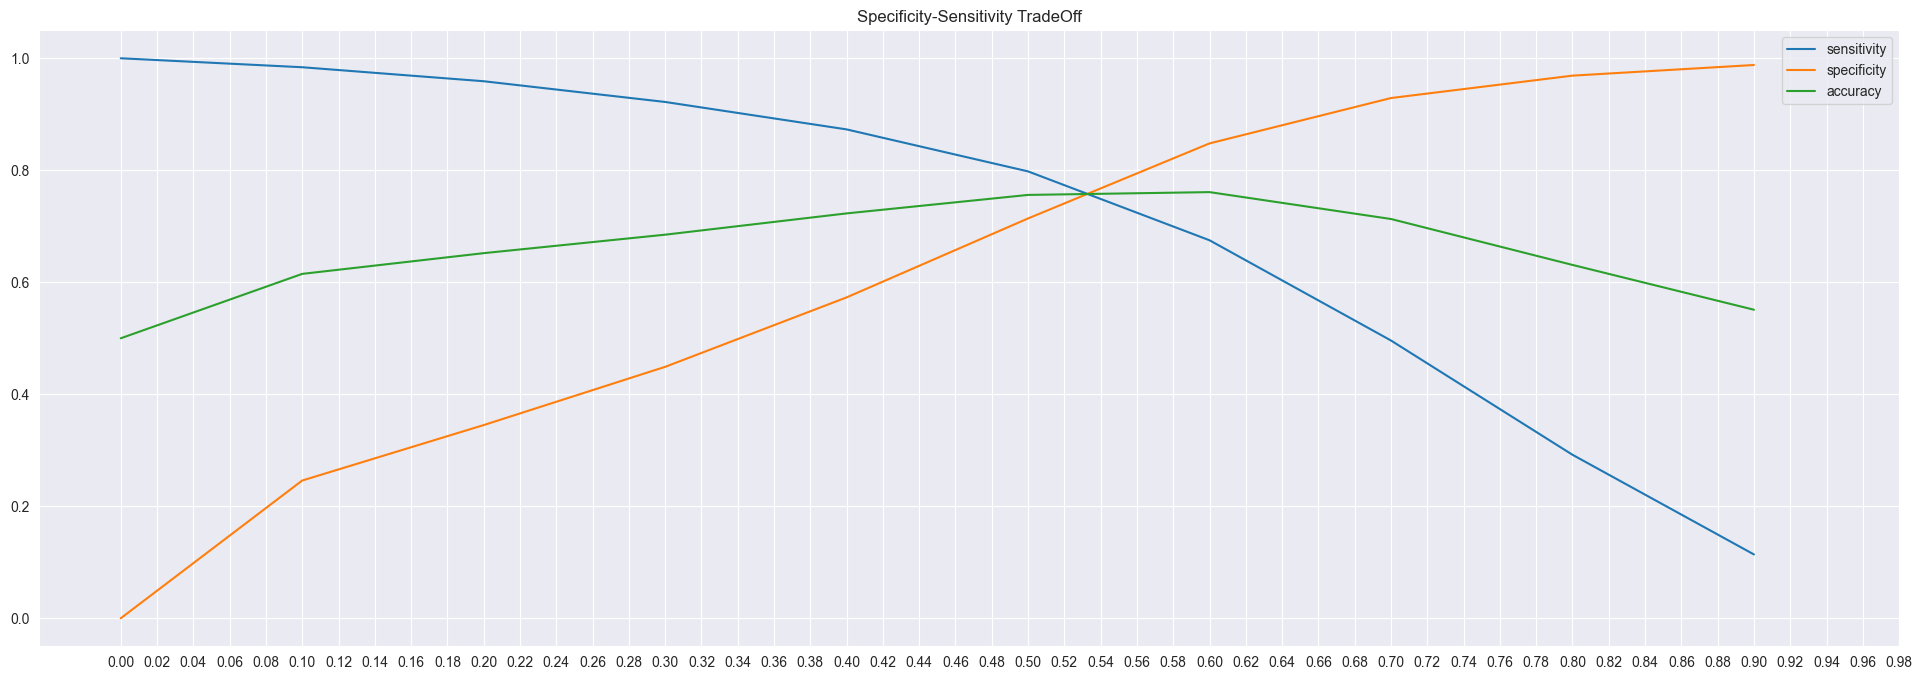

In [318]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [319]:
optimum_cutoff = 0.55
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[10498  2897]
 [ 3395 10000]]

Confusion Matrix for test: 
 [[4526 1238]
 [ 180  362]]


In [320]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.765
Sensitivity / True Positive Rate / Recall : 0.747
Specificity / True Negative Rate :  0.784
Precision / Positive Predictive Value : 0.775
F1-score : 0.761


Test Performance : 

Accuracy : 0.775
Sensitivity / True Positive Rate / Recall : 0.668
Specificity / True Negative Rate :  0.785
Precision / Positive Predictive Value : 0.226
F1-score : 0.338


In [321]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.837 

ROC AUC score for Test :  0.79


## Model 1 : Logistic Regression (Interpretable Model Summary)¶

In [322]:
!pip3 install lxml

In [323]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



monthly_2g_8_1     -5.3130
monthly_2g_6_1     -2.6534
const               1.7330
monthly_3g_8_0      1.6141
monthly_2g_8_0     -1.4591
monthly_3g_7_0     -0.5886
sachet_2g_6_0      -0.5515
sachet_3g_7_0      -0.4170
total_rech_num_8   -0.2361
total_rech_num_7    0.0801
std_og_t2f_mou_8   -0.0753
total_rech_num_6    0.0547
sachet_2g_8_0      -0.0363
sachet_3g_6_0      -0.0312
Name: coef, dtype: float64

### PCA

In [324]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[-9.99999428e-01, -3.65702989e-05, -1.66812428e-04, ...,
         2.46429309e-07, -2.79034190e-07,  1.77060592e-08],
       [ 4.46500740e-04,  1.65181408e-01,  1.90605657e-01, ...,
         3.63051651e-05, -3.16208195e-05, -4.34702874e-06],
       [-8.10397200e-05,  7.66422557e-02,  1.03245047e-01, ...,
         7.37450098e-06, -3.34338142e-06, -2.96679678e-06],
       ...,
       [-6.14240536e-09,  1.78854072e-06, -5.87888377e-07, ...,
         4.14936804e-02,  4.18027761e-02,  3.64194520e-02],
       [ 0.00000000e+00, -4.74383482e-17,  5.74189887e-17, ...,
        -2.19972809e-16, -9.62810016e-16,  7.75240113e-16],
       [-0.00000000e+00, -1.08031109e-17,  1.01003855e-16, ...,
         3.96128845e-16, -7.88362964e-16,  4.60776662e-17]])

In [325]:
pca.explained_variance_ratio_

array([9.86351946e-01, 3.75424937e-03, 2.20040600e-03, 1.64484741e-03,
       1.48309703e-03, 1.25508157e-03, 6.14352016e-04, 3.58293335e-04,
       3.40783731e-04, 2.55698976e-04, 2.32707811e-04, 2.05201919e-04,
       1.79073602e-04, 1.42451964e-04, 1.06865809e-04, 8.96916558e-05,
       8.42120385e-05, 7.43790416e-05, 7.21207591e-05, 6.19917236e-05,
       5.95773633e-05, 4.89198248e-05, 4.42486241e-05, 3.93133873e-05,
       3.15166346e-05, 2.82655736e-05, 2.58710617e-05, 1.92682255e-05,
       1.74890400e-05, 1.54588316e-05, 1.42250624e-05, 1.33187763e-05,
       1.26966123e-05, 1.22653812e-05, 1.01745380e-05, 9.00711833e-06,
       7.69414716e-06, 7.24458618e-06, 6.92343860e-06, 6.59917439e-06,
       6.21401766e-06, 5.98349008e-06, 5.55771966e-06, 4.96284147e-06,
       4.29036446e-06, 3.55970294e-06, 3.30534334e-06, 3.04448075e-06,
       2.37676240e-06, 2.17662242e-06, 2.06769148e-06, 1.87373452e-06,
       1.62572702e-06, 1.39982394e-06, 1.25504478e-06, 1.12825819e-06,
      

##### Scree Plot

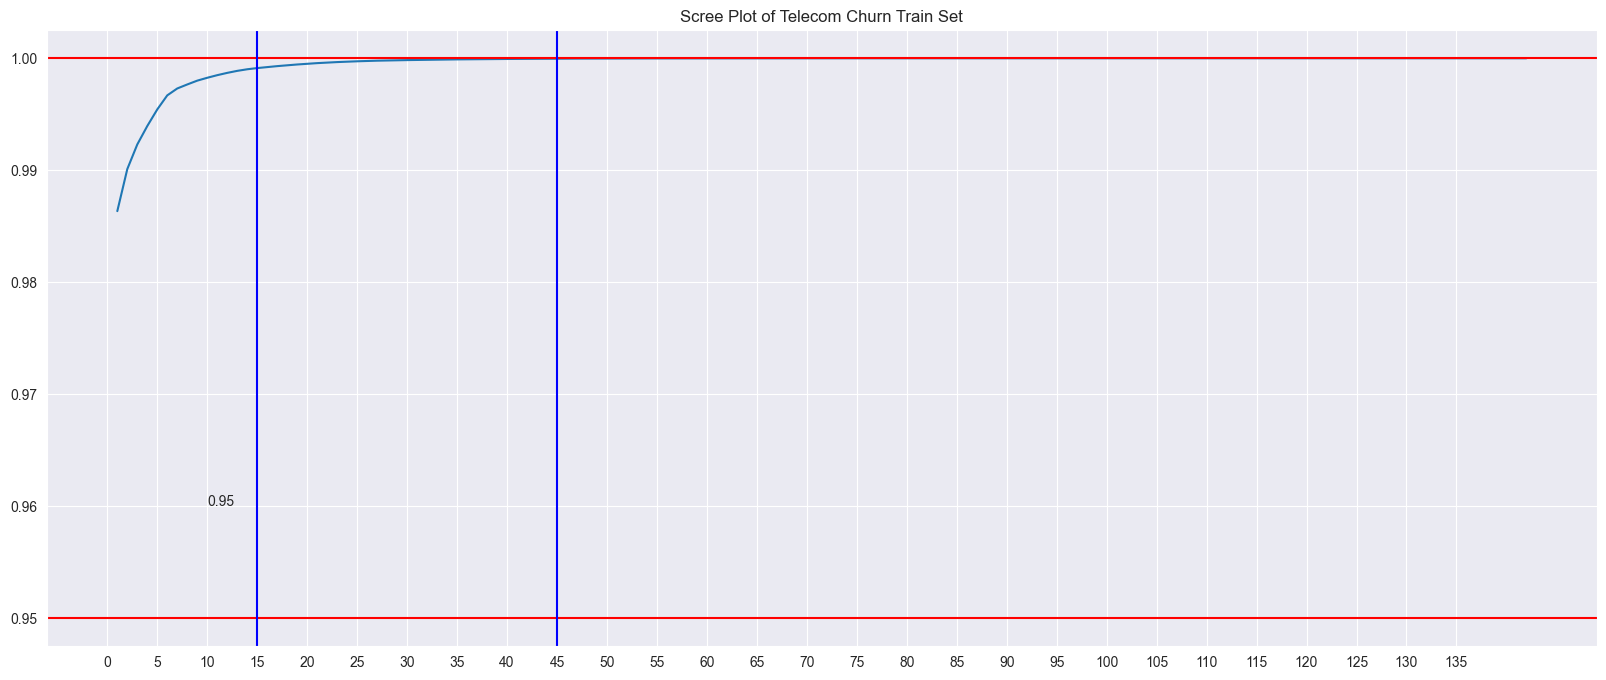

In [326]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

In [328]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,churn_probability
23969,11156.198199,-587.911060,-1122.967865,-510.353550,223.416163,655.484974,-2.893953,43.769135,-902.493593,130.541471,384.084873,257.731239,622.764830,546.500380,-29.654672,-48.480668,294.721630,-71.019606,0.981745,-328.824922,6.318885,118.729386,-425.067185,-23.037396,-70.210668,-169.791693,3.630333,0.742489,-38.642021,-41.391928,-187.247090,-119.727825,-10.132431,23.353447,25.492195,-19.122763,10.037783,-32.849308,-162.138057,-28.186424,68.098988,-5.187034,7.561851,-14.636342,-19.004081,0
53530,-18405.524084,-1461.642032,796.453400,350.424402,-58.845075,-489.851985,-633.785651,-110.897333,-60.957215,124.357192,-58.903687,31.509655,-109.213490,-99.100443,24.623929,353.032964,134.932230,-54.856983,40.087002,-4.204087,-75.018232,48.924490,-64.494271,-78.359407,-95.534799,2.396456,4.776478,-83.003397,10.165996,123.450072,16.404687,-32.798087,21.480215,-34.961216,-68.005751,2.068329,-25.614310,0.207629,5.099420,4.138106,-12.263450,-25.266116,0.839079,-14.083085,4.136737,0
38932,-3807.669457,3733.677972,299.748324,2969.209074,-930.679261,836.458501,94.659076,526.512278,-161.854404,309.938451,259.974130,-232.302676,190.968928,46.048236,393.901993,40.512845,-132.061669,47.038847,-76.651401,-2.434877,-51.624869,-19.123371,-15.069245,-19.208140,48.919842,-20.189454,-29.552650,27.301219,-64.030959,82.209062,-5.540957,-5.266308,-34.292252,9.176835,11.223234,10.854078,21.589316,6.511391,29.190798,-3.651661,-24.809553,2.840904,-79.939818,-50.570091,19.440486,0
63706,-28580.374806,606.844037,-406.168787,-164.648277,-848.079596,-187.294932,11.210940,434.365682,428.730739,-199.338276,-322.171311,433.412566,362.872795,229.434637,-346.308465,45.919456,-13.469628,21.229653,-10.792645,196.796870,-113.950675,-25.485502,-109.396100,-22.095190,-2.334458,25.435325,34.762946,56.697669,70.560632,-68.142553,13.219604,48.763193,-12.359916,-11.312566,-24.774703,-26.503448,19.551130,49.392521,-23.340558,-50.979316,-13.585643,-13.383993,-8.764220,21.592651,-15.146251,0
8614,26510.960677,-1102.959509,212.898641,455.816614,-96.949761,-966.408330,-681.275006,15.272080,160.074607,21.835643,20.449777,-65.357315,-179.462751,135.145402,-18.617711,-43.472937,-41.349658,-3.954096,-23.285143,26.539507,-59.001319,7.326870,-2.346137,-40.420728,50.989875,-17.278228,1.360106,-13.841894,-19.220366,-5.288080,-9.972571,-19.706604,46.440247,-48.375612,18.929779,16.454238,-16.894134,2.739417,7.883375,18.561327,-6.292244,-22.381940,-5.868524,-34.508459,14.433670,0


In [329]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8)

### Model 2 : PCA + Logistic Regression Model

In [330]:
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca )

LogisticRegression(class_weight='balanced', random_state=100)

In [331]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 0, 0, 0, 0])

In [332]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 0, 1, 1, 1])

#### Baseline Performance

In [333]:
rain_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.765
Sensitivity / True Positive Rate / Recall : 0.747
Specificity / True Negative Rate :  0.784
Precision / Positive Predictive Value : 0.775
F1-score : 0.761

Test Performance :

Accuracy : 0.588
Sensitivity / True Positive Rate / Recall : 0.924
Specificity / True Negative Rate :  0.557
Precision / Positive Predictive Value : 0.164
F1-score : 0.279


#### Hyperparameter Tuning

In [334]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [335]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [336]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8712494275782122
Best Parameters : {'C': 10, 'penalty': 'l2'}


In [337]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 0, 0, 0, 0])

In [338]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 0, 1, 1, 1])

In [339]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.586
Sensitivity / True Positive Rate / Recall : 0.922
Specificity / True Negative Rate :  0.553
Precision / Positive Predictive Value : 0.168
F1-score : 0.284

Test Performance :

Accuracy : 0.585
Sensitivity / True Positive Rate / Recall : 0.923
Specificity / True Negative Rate :  0.553
Precision / Positive Predictive Value : 0.163
F1-score : 0.277


## Model 3 : PCA + Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08844799695499096,
                                     1: 0.911552003045009},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [341]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs

[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  30 out of  

[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 1

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concu

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurr

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finishe

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08844799695499096,
                                                            1: 0.911552003045009},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [342]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)


Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elap

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBac

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 1

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Done

[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done  50 out of  

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08844799695499096,
                                                            1: 0.911552003045009},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [343]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8823051080045847
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 30, 'n_estimators': 100}


In [344]:

# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 0, 0, 0, 0])

In [345]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 1, 1, 0])

In [346]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.884
Sensitivity / True Positive Rate / Recall : 0.827
Specificity / True Negative Rate :  0.889
Precision / Positive Predictive Value : 0.423
F1-score : 0.56

Test Performance :

Accuracy : 0.872
Sensitivity / True Positive Rate / Recall : 0.744
Specificity / True Negative Rate :  0.884
Precision / Positive Predictive Value : 0.376
F1-score : 0.5


In [347]:
## out of bag error 
pca_rf_best_fit.oob_score_


0.8648722131593257

#### Model 4 : PCA + XGBoost

In [348]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

ModuleNotFoundError: No module named 'xgboost'